In [1]:
!pip install pandas

In [18]:
!pip install matplotlib


  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)


In [82]:
!pip install openpyxl

In [24]:
!pip install gensim

  Using cached gensim-4.1.2-cp39-cp39-win_amd64.whl (24.0 MB)
  Using cached Cython-0.29.23-cp39-cp39-win_amd64.whl (1.7 MB)


In [30]:
!pip install sklearn

  Using cached sklearn-0.0-py2.py3-none-any.whl


In [81]:
!pip install xgboost

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
os.chdir('C:\\Users\\adhit\\Desktop\\pers\\Coding Challenge SAP')

In [5]:
true_df=pd.read_csv("True.csv" ,skipinitialspace = True)
fake_df=pd.read_csv("Fake.csv" ,skipinitialspace = True)
true_df['class'] = 1
fake_df['class'] = 0

In [6]:
news_df = pd.concat([true_df,fake_df])

In [7]:
news_df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

Text(0, 0.5, 'Number of Occurances')

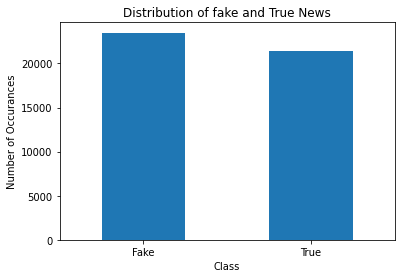

In [8]:
count_classes = pd.value_counts(news_df['class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Distribution of fake and True News")
plt.xticks(range(2), ['Fake','True'])
plt.xlabel("Class")
plt.ylabel("Number of Occurances")

# Data Cleaning

In [9]:
#Replace empty string with NA Values.

news_df['text'].replace('', np.nan, inplace=True)

In [10]:
# check for NA values.
news_df['text'].isna().values.any()

True

In [11]:
# drop the NA values.
news_df.dropna(inplace=True)

In [12]:
#Removing duplicates

news_df['dup'] = news_df.duplicated(subset=['text'], keep='first')
news_df.head()

title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  class    dup  
0  December 31, 2017       1  False  
1  December 29, 2017       1  False  
2  December 31, 2017       1  False  
3  December 30, 2017       1  False  
4  December 29, 2017       1  False

In [13]:
# removing the duplicate columns.

news_df = news_df[news_df['dup'] == False]

In [14]:
#deleting the column 'dup'

del news_df['dup']

In [15]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38644 entries, 0 to 22702
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    38644 non-null  object
 1   text     38644 non-null  object
 2   subject  38644 non-null  object
 3   date     38644 non-null  object
 4   class    38644 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.8+ MB


In [17]:
news_df.shape

(38644, 5)

#  Text Preprocessing

In [138]:
!pip install spacy

  Using cached preshed-3.0.6-cp39-cp39-win_amd64.whl (112 kB)
  Using cached spacy_legacy-3.0.8-py2.py3-none-any.whl (14 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl (181 kB)
  Using cached blis-0.7.5-cp39-cp39-win_amd64.whl (6.6 MB)
  Using cached pydantic-1.8.2-cp39-cp39-win_amd64.whl (1.9 MB)
  Using cached pathy-0.6.1-py3-none-any.whl (42 kB)
  Using cached murmurhash-1.0.6-cp39-cp39-win_amd64.whl (21 kB)
  Using cached wasabi-0.9.0-py3-none-any.whl (25 kB)
  Using cached thinc-8.0.13-cp39-cp39-win_amd64.whl (1.0 MB)
  Using cached typer-0.4.0-py3-none-any.whl (27 kB)
  Using cached cymem-2.0.6-cp39-cp39-win_amd64.whl (36 kB)
  Using cached catalogue-2.0.6-py3-none-any.whl (17 kB)
  Using cached spacy_loggers-1.0.1-py3-none-any.whl (7.0 kB)
  Using cached srsly-2.4.2-cp39-cp39-win_amd64.whl (451 kB)
  Using cached smart_open-5.2.1-py3-none-any.whl (58 kB)
  Using cached click-8.0.3-py3-none-any.whl (97 kB)


In [139]:
!pip install nltk

  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)


In [18]:
import re

def replace_words(text):
    
    dict_country={'U.S.\s':'America '}
    
    for i, j in dict_country.items():
        text = re.sub(i, j,text,flags=re.IGNORECASE)
    return text

In [19]:
news_df['standardized_text']=news_df['text'].apply(replace_words)

In [20]:
import re
import spacy
from spacy.lang.en import English
from nltk.stem.snowball import SnowballStemmer
nlp = English()
nlp2= spacy.load('en_core_web_lg')
tokenizer = nlp.tokenizer
s_stemmer=SnowballStemmer(language='english')

def preprocess(input_text):
      
    # remove the web links in the text
    http_pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    text_http_removed = http_pattern.sub('', input_text)
    
    # regular expression keeping only letters 
    letters_only_text = re.sub("[^a-zA-Z]", " ", text_http_removed)
    
       
    # convert to lower case
    text_to_lower_case= letters_only_text.lower()
    
    
    # word tokenization
    token_list = []
    tokens = tokenizer(text_to_lower_case)
    for token in tokens:
        token_list.append(token.text)
    
    
    #stop words removal
    stop_words_removed_text=[]
    for tok in token_list:
        if nlp.vocab[tok].is_stop == False and len(tok.strip())!=0 and len(tok)!=1:
            stop_words_removed_text.append(tok)
#     print(stop_words_removed_text)


#      stemming
#     stemmed_text=[]
#     for word in stop_words_removed_text:
#         stemmed_text.append(s_stemmer.stem(word))
#      print(stemmed_text)
    
    
    #Lemmatization
    lemmatized_text=[]
    string=''
    for w in stop_words_removed_text:
        if string=='':
            string = w
        else:
            string= string + ' ' + w 
#     print(string)
    nlp_string = nlp2(string)
    for word in nlp_string:
        lemmatized_text.append(word.lemma_)
#     print(lemmatized_text)
    

    # converting list back to string
    return " ".join(lemmatized_text)

In [160]:
# the preprocessed objective is appended to the project_df dataframe.
news_df['cleaned_text'] = news_df['standardized_text'].apply(preprocess)

In [159]:
news_df.cleaned_text[0]

'washington reuters head conservative republican faction america congress vote month huge expansion national debt pay tax camerica call fiscal conservative sunday urge budget restraint keep sharp pivot way republicans america representative mark meadow speak cbs face nation draw hard line federal spending lawmaker brace battle january return holiday wednesday lawmaker begin try pass federal budget fight likely link issamerica immigration policy november congressional election campaign approach republican seek control congress president donald trump republicans want big budget increase military spending democrats want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration willing go increase non defense discretionary spending percent meadow chairman small influential house freedom caucus say program democrats say need government pay raise percent fiscal conservative

In [21]:
news_df= pd.read_json("news_df_prepro.json")

In [63]:
news_df_sample = news_df.sample(5000)

In [76]:
news_df_sample['class'].value_counts()

1    2723
0    2277
Name: class, dtype: int64

# TF-IDF

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vector =TfidfVectorizer(max_features=5000,ngram_range=(1,3))

X=tfidf_vector.fit_transform(news_df_sample.cleaned_text).toarray()

In [65]:
X.shape

(5000, 5000)

In [66]:
y=news_df_sample['class']

In [67]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [69]:
tfidf_vector.get_feature_names()[:1]

['abadi']

In [70]:
count_df = pd.DataFrame(X_train, columns=tfidf_vector.get_feature_names())

In [72]:
count_df.head()

abadi  abandon  abbas  abc  abc news  abdullah  abe  abedin  abide  \
0    0.0      0.0    0.0  0.0       0.0       0.0  0.0     0.0    0.0   
1    0.0      0.0    0.0  0.0       0.0       0.0  0.0     0.0    0.0   
2    0.0      0.0    0.0  0.0       0.0       0.0  0.0     0.0    0.0   
3    0.0      0.0    0.0  0.0       0.0       0.0  0.0     0.0    0.0   
4    0.0      0.0    0.0  0.0       0.0       0.0  0.0     0.0    0.0   

   ability  able  abortion  abroad  absolute  absolutely     abu  abuse  \
0      0.0   0.0       0.0     0.0       0.0         0.0  0.0000    0.0   
1      0.0   0.0       0.0     0.0       0.0         0.0  0.0000    0.0   
2      0.0   0.0       0.0     0.0       0.0         0.0  0.0636    0.0   
3      0.0   0.0       0.0     0.0       0.0         0.0  0.0000    0.0   
4      0.0   0.0       0.0     0.0       0.0         0.0  0.0000    0.0   

   academic  academy  accept  acceptable  access  accident  accompany  \
0       0.0      0.0     0.0         0.0     0.0       0.0        0.0   
1       0.0      0.0     0.0         0.0     0.0       0.0        0.0   
2       0.0      0.0     0.0         0.0     0.0       0.0        0.0   
3       0.0      0.0     0.0         0.0     0.0       0.0        0.0   
4       0.0      0.0     0.0         0.0     0.0       0.0        0.0   

   accomplish  accomplishment  accord  according  account  accountability  \
0         0.0             0.0     0.0        0.0      0.0             0.0   
1         0.0             0.0     0.0        0.0      0.0             0.0   
2         0.0             0.0     0.0        0.0      0.0             0.0   
3         0.0             0.0     0.0        0.0      0.0             0.0   
4         0.0             0.0     0.0        0.0      0.0             0.0   

   accountable  accuracy  accurate  accusation    accuse  achieve  \
0          0.0       0.0       0.0         0.0  0.026013      0.0   
1          0.0       0.0       0.0         0.0  0.000000      0.0   
2          0.0       0.0       0.0         0.0  0.000000      0.0   
3          0.0       0.0       0.0         0.0  0.029111      0.0   
4          0.0       0.0       0.0         0.0  0.000000      0.0   

   achievement  acknowledge  acosta  acquire  acr  act  action  active  \
0          0.0     0.036580     0.0      0.0  0.0  0.0     0.0     0.0   
1          0.0     0.000000     0.0      0.0  0.0  0.0     0.0     0.0   
2          0.0     0.049947     0.0      0.0  0.0  0.0     0.0     0.0   
3          0.0     0.000000     0.0      0.0  0.0  0.0     0.0     0.0   
4          0.0     0.000000     0.0      0.0  0.0  0.0     0.0     0.0   

   actively  activist  activity  actor  actress  actual  actually   ad  adam  \
0       0.0       0.0       0.0    0.0      0.0     0.0       0.0  0.0   0.0   
1       0.0       0.0       0.0    0.0      0.0     0.0       0.0  0.0   0.0   
2       0.0       0.0       0.0    0.0      0.0     0.0       0.0  0.0   0.0   
3       0.0       0.0       0.0    0.0      0.0     0.0       0.0  0.0   0.0   
4       0.0       0.0       0.0    0.0      0.0     0.0       0.0  0.0   0.0   

   adam schiff       add  addition  additional  address  administration  \
0          0.0  0.000000       0.0         0.0      0.0             0.0   
1          0.0  0.000000       0.0         0.0      0.0             0.0   
2          0.0  0.029379       0.0         0.0      0.0             0.0   
3          0.0  0.000000       0.0         0.0      0.0             0.0   
4          0.0  0.000000       0.0         0.0      0.0             0.0   

   administration official  administration official say  administration say  \
0                      0.0                          0.0                 0.0   
1                      0.0                          0.0                 0.0   
2                      0.0                          0.0                 0.0   
3                      0.0                          0.0                 0.0   
4                      0

# Multinominal Naive Bayes

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [79]:
from sklearn import metrics
import itertools

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

accuracy:   0.935
Confusion matrix, without normalization


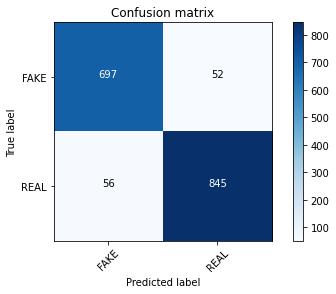

In [80]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])b

In [60]:
predicted_values= y_test

In [61]:
predicted_values['pred']

# XGBoost

In [86]:
from xgboost import XGBRegressor
from xgboost import XGBClassifier

my_model = XGBClassifier()
# Add silent=True to avoid printing out updates with each cycle
my_model.fit(X_train, y_train)

C:\Users\adhit\anaconda3\envs\nlp_new\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [87]:
# make predictions
predictions = my_model.predict(X_test)

from sklearn.metrics import mean_absolute_error
print("Mean Absolute Error : " + str(mean_absolute_error(predictions, y_test)))

Mean Absolute Error : 0.0030303030303030303


In [95]:
score = metrics.accuracy_score(y_test, predictions)
score

0.996969696969697

In [ ]:
predicted_values.append(predictions, pred,)

# LSTM

In [96]:
import tensorflow as tf

In [97]:
tf.__version__

'2.8.0'

In [98]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [99]:
### Vocabulary size
voc_size=10000

# One hot representation

In [101]:
onehot_repr=[one_hot(words,voc_size)for words in news_df_sample['cleaned_text']] 


[[1912,
  3458,
  3066,
  5187,
  7448,
  3772,
  6657,
  3022,
  6625,
  8183,
  5303,
  1857,
  4411,
  8952,
  7137,
  7220,
  8422,
  8883,
  1475,
  9762,
  2633,
  4284,
  3458,
  9165,
  4263,
  1722,
  8073,
  4164,
  6657,
  3022,
  6304,
  6663,
  5055,
  3654,
  2543,
  1330,
  8817,
  1550,
  9865,
  8183,
  3552,
  1280,
  1722,
  6331,
  2633,
  62,
  1529,
  995,
  7187,
  3022,
  2392,
  3281,
  2042,
  7448,
  7923,
  985,
  3022,
  9751,
  8528,
  3881,
  7026,
  7663,
  4795,
  8073,
  7575,
  9653,
  2631,
  9025,
  6657,
  3022,
  4455,
  7407,
  1912,
  3458,
  8844,
  4394,
  6045,
  4263,
  1722,
  8591,
  437,
  9717,
  7448,
  7367,
  7026,
  9081,
  8175,
  885,
  7380,
  576,
  5634,
  2044,
  6615,
  9667,
  9535,
  6671,
  576,
  5303,
  3654,
  7600,
  2418,
  3696,
  507,
  4080,
  4813,
  4540,
  7583,
  980,
  4423,
  4248,
  3022,
  4813,
  1507,
  714,
  7622,
  2121,
  4716,
  3633,
  2273,
  3852,
  3022,
  1714,
  4358,
  3022,
  8894,
  8175,
  4

In [105]:
len(max(onehot_repr))

160

# embedding representation

In [106]:
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 8538 3082 3535]
 [2140 2915 8990 ... 4556   39 2568]
 [   0    0    0 ... 8859 2101 5975]
 ...
 [   0    0    0 ... 3442 8882 6267]
 [   0    0    0 ... 7710 7740 5856]
 [ 985 5962 4707 ... 3742 1141  980]]


In [107]:
embedded_docs[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1912, 3458, 3066, 5187, 7448, 3772, 6657, 3022, 6625, 8183,
       5303, 1857, 4411, 8952, 7137, 7220, 8422, 8883, 1475, 9762, 2633,
       4284, 3458, 9165, 4263, 1722, 8073, 4164, 6657, 3022, 6304, 6663,
       5055, 3654, 2543, 1330, 8817, 1550, 9865, 8183, 3552, 1280, 1722,
       6331, 2633,   62, 1529,  995, 7187, 3022, 2392, 3281, 2042, 7448,
       7923,  985, 3022, 9751, 8528, 3881, 7026, 7663, 4795, 8073, 7575,
       9653, 2631, 9025, 6657, 3022, 4455, 7407, 1912, 3458, 8844, 4394,
       6045, 4263, 1722, 8591,  437, 9717, 7448, 7367, 7026, 9081, 8175,
        885, 7380,  576, 5634, 2044, 6615, 9667, 9535, 6671,  576, 5303,
       3654, 7600, 2418, 3696,  507, 4080, 4813, 4540, 7583,  980, 4423,
       4248, 3022, 4813, 1507,  714, 7622, 2121, 4716, 3633, 2273, 3852,
       3022, 1714, 4358, 3022, 8894, 8175, 4423, 24

# Creating Model

In [125]:
## Creating model
embedding_vector_features=100
model_lstm=Sequential()
model_lstm.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model_lstm.add(LSTM(100))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [126]:
len(embedded_docs),y.shape

(5000, (5000,))

In [127]:
X_final=np.array(embedded_docs)
y_final=np.array(y)
X_final.shape,y_final.shape

((5000, 200), (5000,))

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [129]:
### Finally Training
model_lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3,batch_size=64)

Epoch 1/3
53/53 [==============================] - 12s 196ms/step - loss: 0.5131 - accuracy: 0.7919 - val_loss: 0.2084 - val_accuracy: 0.9242
Epoch 2/3
53/53 [==============================] - 10s 183ms/step - loss: 0.1056 - accuracy: 0.9630 - val_loss: 0.1360 - val_accuracy: 0.9424
Epoch 3/3
53/53 [==============================] - 10s 187ms/step - loss: 0.0310 - accuracy: 0.9925 - val_loss: 0.1505 - val_accuracy: 0.9503


# Prediction

In [133]:
y_pred = (model_lstm.predict(X_test) > 0.5).astype("int32")

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[709,  60],
       [ 22, 859]], dtype=int64)

In [137]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9503030303030303